<a href="https://colab.research.google.com/github/erdem-tuncer/Quick_Look/blob/main/Copy_of_Forecast_Utilization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Exploration - Wenbo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GDL - Cohort 17 Collaboration Drive/Project Files/AnalyticsDataCleaned.csv')

In [ ]:
df.head()

,emailID,Email,JobTitle,JobFamily,Skills,SkillType,Location,Country,Vendor,ContractType,...,Private,Communication,Development,Documentation,Meetings,Support,Utilities,Testing,Utilization_8,Utilization_TT
0,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,0.92,1.17,0.0,0.2,0.18,0.0,0.13,2.05,0.47,0.46
1,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,0.90,1.22,0.0,0.2,0.17,0.0,0.13,1.05,0.35,0.31
2,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,1.02,1.13,0.0,0.0,0.00,0.0,0.00,1.17,0.29,0.27
3,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,0.98,1.13,0.0,0.0,0.00,0.0,0.13,1.05,0.29,0.27
4,Aakash.Kohli@sapvueinfo.com,aakash.kohli@sapvueinfo.com,Tester,QA Testing,Tester,Commodity,Pune,India,Information Systems,T&M,...,0.92,1.19,0.0,0.2,0.18,0.0,0.13,1.03,0.34,0.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313943 entries, 0 to 313942
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   emailID         313943 non-null  object 
 1   Email           313943 non-null  object 
 2   JobTitle        313943 non-null  object 
 3   JobFamily       313943 non-null  object 
 4   Skills          313943 non-null  object 
 5   SkillType       313943 non-null  object 
 6   Location        313943 non-null  object 
 7   Country         313943 non-null  object 
 8   Vendor          313943 non-null  object 
 9   ContractType    313943 non-null  object 
 10  Date            313943 non-null  object 
 11  StartTime       313943 non-null  object 
 12  EndTime         313943 non-null  object 
 13  TotalTime       313943 non-null  float64
 14  WorkTime        313943 non-null  float64
 15  Unaccounted     313943 non-null  float64
 16  Private         313943 non-null  float64
 17  Communicat

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df2 = df.groupby(["emailID"]).agg({"Date" : ["min", "max", "count"]})
df2.columns = ["_".join(x) for x in df2.columns.ravel()]
df2.reset_index(level = 0, inplace = True)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  


,emailID,Date_min,Date_max,Date_count
0,Aakash.Kohli@sapvueinfo.com,2021-07-27,2022-02-28,149
1,Aakash.Nanda@sapvueinfo.com,2021-07-27,2022-02-28,149
2,Abbas.Jafar@sapvueinfo.com,2021-07-27,2022-02-28,149
3,Abdul.Farhan.@sapvueinfo.com,2021-07-27,2022-02-28,149
4,Abhay.Duvedi@sapvueinfo.com,2021-07-27,2022-02-28,149
...,...,...,...,...
2102,Zohaib.Mirza@sapvueinfo.com,2021-07-27,2022-02-28,149
2103,Zoltan.Martonffy@sapvueinfo.com,2021-07-27,2022-02-28,149
2104,Zubair.Mohammed@sapvueinfo.com,2021-07-27,2022-02-28,149
2105,Zubayr.Shariff@sapvueinfo.com,2021-07-27,2022-02-28,149


In [ ]:
print(len(df2[df2["Date_min"] != pd.Timestamp(2021,7,27)]))
print(len(df2[df2["Date_max"] != pd.Timestamp(2022,2,28)]))
print(len(df2[df2["Date_count"] != 149]))

0
0
2


The data set contains 2107 distinct email IDs. The starting date is 07/27/2021 and the ending date is 02/28/2022. 

### Feature Engineering: to be continued

In [ ]:
sample = df[df['emailID'] == "prabal.bhattacharyya@sapvueinfo.com"]

In [ ]:
sample.select_dtypes(include=['float64'])

,TotalTime,WorkTime,Unaccounted,Private,Communication,Development,Documentation,Meetings,Support,Utilities,Testing,Utilization_8,Utilization_TT
176118,10.17,8.23,1.51,0.43,3.35,1.62,0.85,0.16,0.15,2.10,0.0,1.03,0.81
176119,9.28,8.44,0.42,0.42,3.48,1.72,0.83,0.16,0.15,2.10,0.0,1.06,0.91
176120,9.17,7.69,1.00,0.48,2.14,1.51,0.96,0.00,0.14,2.94,0.0,0.96,0.84
176121,8.12,6.86,0.80,0.46,2.14,1.61,0.80,0.00,0.15,2.16,0.0,0.86,0.84
176122,10.32,9.49,0.40,0.43,3.41,1.57,0.87,0.16,0.15,3.33,0.0,1.19,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176262,9.63,8.87,0.33,0.43,3.21,1.67,0.82,0.10,0.00,3.07,0.0,1.11,0.92
176263,10.27,8.75,1.09,0.43,3.08,1.71,0.82,0.10,0.00,3.04,0.0,1.09,0.85
176264,10.37,9.10,0.84,0.43,3.18,1.74,0.82,0.10,0.00,3.26,0.0,1.14,0.88
176265,10.33,8.92,0.98,0.43,3.14,1.79,0.82,0.10,0.00,3.07,0.0,1.12,0.86


No handles with labels found to put in legend.


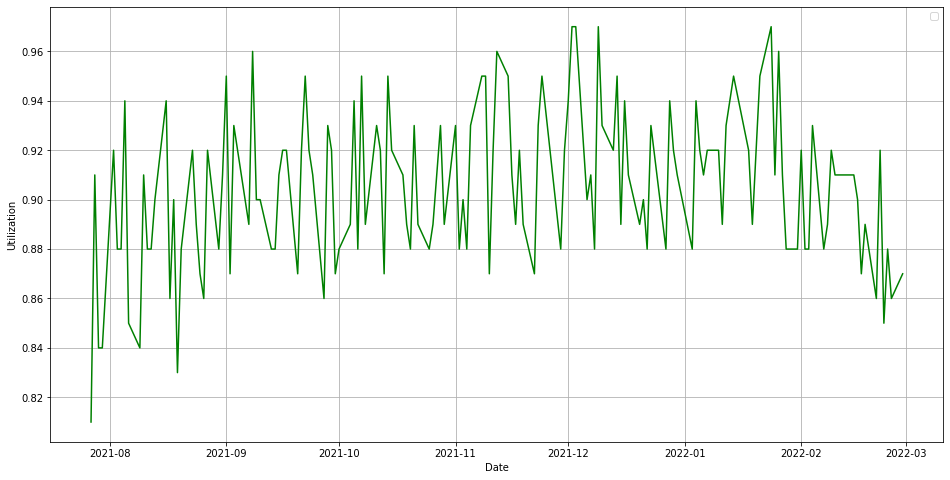

In [ ]:
plt.figure(figsize=(16,8))
plt.grid(True)
    
plt.plot(sample["Date"], sample["Utilization_TT"], color = "green")
  
plt.xlabel("Date")
plt.ylabel("Utilization")
plt.legend()

In [ ]:
y = np.array(sample["Utilization_TT"])
X = np.array(sample.select_dtypes(include='float64').drop(["Utilities", "Utilization_8", "Utilization_TT"], axis = 1))

In [ ]:
def data_prep(data, target, start, end, window, horizon):
     X = []
     y = []
     start = start + window
     if end is None:
         end = len(data) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(data[indices])
         indicey = range(i, i+horizon)
         y.append(target[indicey])
     return np.array(X), np.array(y) 

In [ ]:
hist_window = 5
forecast_horizon = 1

In [ ]:
X_train, y_train = data_prep(X, y, 0, 95, hist_window, forecast_horizon)
X_val, y_val = data_prep(X, y, 95, 120, hist_window, forecast_horizon)
X_test, y_test = data_prep(X, y, 120, None, hist_window, forecast_horizon)

In [ ]:
print("train size: {0}".format(len(X_train)))
print("validation size: {0}".format(len(X_val)))
print("test size: {0}".format(len(X_test)))

train size: 90
validation size: 20
test size: 23


In [ ]:
X_train

array([[[10.17,  8.23,  1.51, ...,  0.16,  0.15,  0.  ],
        [ 9.28,  8.44,  0.42, ...,  0.16,  0.15,  0.  ],
        [ 9.17,  7.69,  1.  , ...,  0.  ,  0.14,  0.  ],
        [ 8.12,  6.86,  0.8 , ...,  0.  ,  0.15,  0.  ],
        [10.32,  9.49,  0.4 , ...,  0.16,  0.15,  0.  ]],

       [[ 9.28,  8.44,  0.42, ...,  0.16,  0.15,  0.  ],
        [ 9.17,  7.69,  1.  , ...,  0.  ,  0.14,  0.  ],
        [ 8.12,  6.86,  0.8 , ...,  0.  ,  0.15,  0.  ],
        [10.32,  9.49,  0.4 , ...,  0.16,  0.15,  0.  ],
        [ 9.38,  8.25,  0.7 , ...,  0.16,  0.14,  0.  ]],

       [[ 9.17,  7.69,  1.  , ...,  0.  ,  0.14,  0.  ],
        [ 8.12,  6.86,  0.8 , ...,  0.  ,  0.15,  0.  ],
        [10.32,  9.49,  0.4 , ...,  0.16,  0.15,  0.  ],
        [ 9.38,  8.25,  0.7 , ...,  0.16,  0.14,  0.  ],
        [10.47,  9.23,  0.81, ...,  0.16,  0.17,  0.  ]],

       ...,

       [[10.28,  9.5 ,  0.36, ...,  0.12,  0.15,  0.  ],
        [10.33,  9.68,  0.22, ...,  0.12,  0.17,  0.  ],
        [10.

In [ ]:
y_train

array([[0.88],
       [0.88],
       [0.94],
       [0.85],
       [0.84],
       [0.91],
       [0.88],
       [0.88],
       [0.9 ],
       [0.94],
       [0.86],
       [0.9 ],
       [0.83],
       [0.88],
       [0.92],
       [0.89],
       [0.87],
       [0.86],
       [0.92],
       [0.88],
       [0.91],
       [0.95],
       [0.87],
       [0.93],
       [0.89],
       [0.96],
       [0.9 ],
       [0.9 ],
       [0.88],
       [0.88],
       [0.91],
       [0.92],
       [0.92],
       [0.87],
       [0.92],
       [0.95],
       [0.92],
       [0.91],
       [0.86],
       [0.93],
       [0.92],
       [0.87],
       [0.88],
       [0.89],
       [0.94],
       [0.88],
       [0.95],
       [0.89],
       [0.93],
       [0.92],
       [0.87],
       [0.95],
       [0.92],
       [0.91],
       [0.89],
       [0.88],
       [0.93],
       [0.89],
       [0.88],
       [0.89],
       [0.91],
       [0.93],
       [0.89],
       [0.93],
       [0.88],
       [0.9 ],
       [0.

### Modeling

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
epochs = 20 
batch_size = 10
embedding_size = 400
dropout_ratio = 0.2

In [ ]:
model = Sequential()
model.add(LSTM(embedding_size, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(dropout_ratio))
model.add(LSTM(embedding_size))
model.add(Dropout(dropout_ratio))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 400)            657600    
                                                                 
 dropout (Dropout)           (None, 5, 400)            0         
                                                                 
 lstm_1 (LSTM)               (None, 400)               1281600   
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 1,939,601
Trainable params: 1,939,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
9/9 [==============================] - 5s 180ms/step - loss: 0.5282 - val_loss: 0.0082
Epoch 2/20
9/9 [==============================] - 1s 66ms/step - loss: 0.0441 - val_loss: 9.2028e-04
Epoch 3/20
9/9 [==============================] - 1s 68ms/step - loss: 0.0226 - val_loss: 0.0022
Epoch 4/20
9/9 [==============================] - 1s 66ms/step - loss: 0.0114 - val_loss: 0.0061
Epoch 5/20
9/9 [==============================] - 1s 65ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 6/20
9/9 [==============================] - 1s 65ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 7/20
9/9 [==============================] - 1s 64ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 8/20
9/9 [==============================] - 1s 68ms/step - loss: 0.0045 - val_loss: 7.4165e-04
Epoch 9/20
9/9 [==============================] - 1s 70ms/step - loss: 0.0032 - val_loss: 4.4036e-04
Epoch 10/20
9/9 [==============================] - 1s 65ms/step - loss: 0.0038 - val_loss: 5.2722e-04
Epoch 11/20


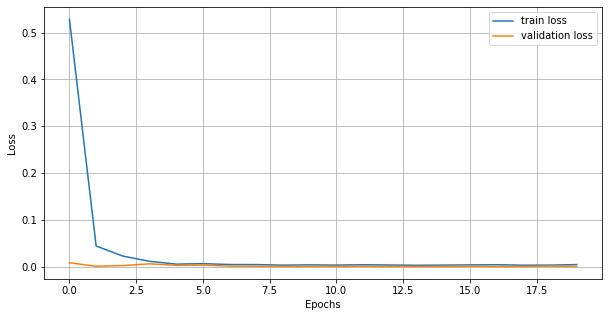

In [ ]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Testing

In [ ]:
def forecast_utilization(model, X, y, set_name):
  predictions = model.predict(X)
  error = mean_squared_error(y, predictions)
  print("mean squared error on {0} set: {1}".format(set_name, round(error, 3)))

  plt.figure(figsize=(10,5))
  plt.grid(True)
  plt.plot(y, label = "ground truth", color = "green")
  plt.plot(predictions, label = "predictions", color = "orange")
  plt.title("forecast utilization on {0} set".format(set_name))
  plt.ylabel("Utilization")
  plt.legend()
  plt.show()

mean squared error on train set: 0.001


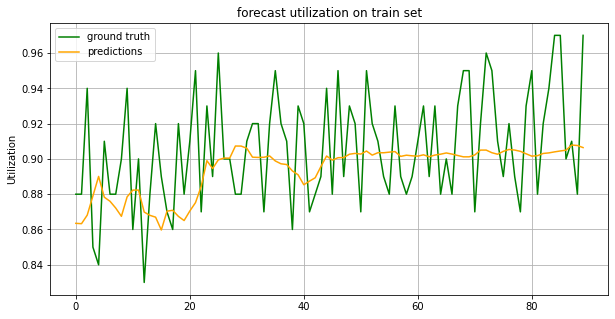

In [ ]:
forecast_utilization(model, X_train, y_train, "train")

mean squared error on validation set: 0.0


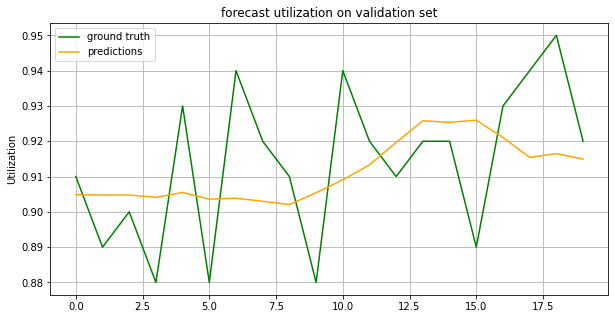

In [ ]:
forecast_utilization(model, X_val, y_val, "validation")

mean squared error on test set: 0.001


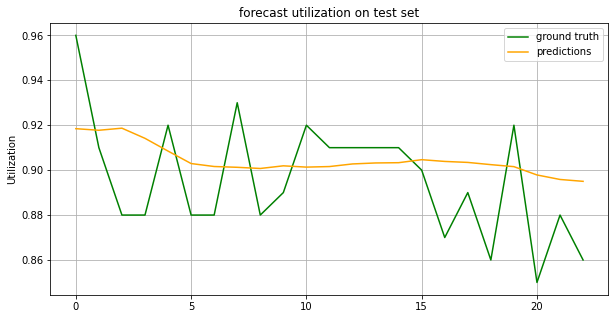

In [ ]:
forecast_utilization(model, X_test, y_test, "test")

# Forecasting with Facebook Prophet Model - ET

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from fbprophet import Prophet
import seaborn as sns

In [ ]:
df = sample.copy()

In [ ]:
# Split train and test data
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['Date', 'Utilization_TT']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

126 23


In [ ]:
# Train the model
model = Prophet()
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print('RMSE: {}'.format(score_rmse))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 0.04544617369272727


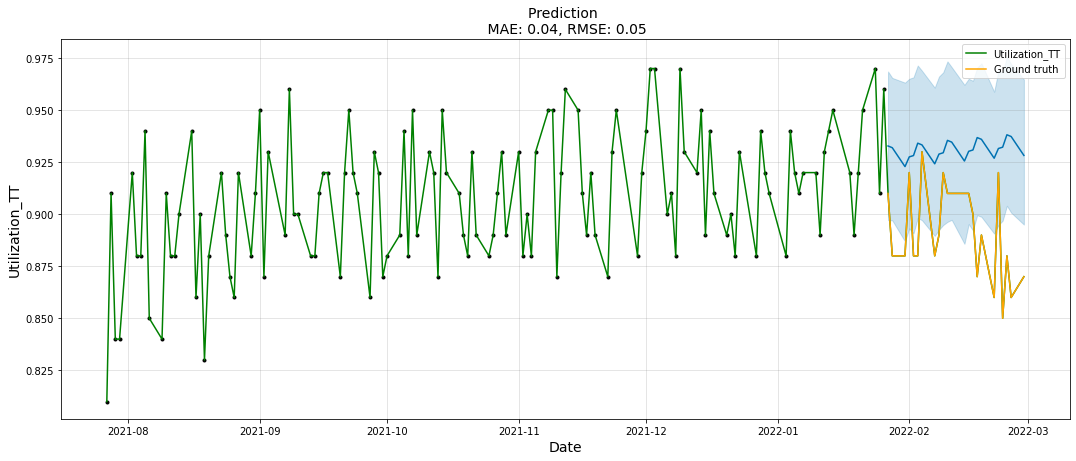

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)

sns.lineplot(x=df['Date'], y=df['Utilization_TT'], ax=ax, color='green', label='Utilization_TT')
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Utilization_TT', fontsize=14)

plt.show()